Вот готовые **сводки по обеим таблицам** в формате `Markdown` — можешь просто вставить их как поясняющие ячейки в ноутбук перед анализом 👇

---

## 📘 Таблица `all_tg_1610.xlsx` — посты Telegram-каналов

Каждая строка соответствует **одному опубликованному посту** в Telegram.
Это справочник исходных сообщений, по которым затем собираются реакции.

| Поле             | Тип          | Описание                                                                                                                                                                                            |
| ---------------- | ------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `id`             | `str (UUID)` | Уникальный идентификатор поста (глобальный ключ, используется для связи с таблицей реакций).                                                                                                        |
| `message_id`     | `int`        | Локальный числовой идентификатор поста внутри конкретного канала (например, t.me/channel/**275543**). Не уникален глобально.                                                                        |
| `date`           | `datetime`   | Время публикации поста в Telegram.                                                                                                                                                                  |
| `message`        | `str`        | Текст поста (контент публикации).                                                                                                                                                                   |
| `id_channel`     | `int`        | Идентификатор канала, где опубликован пост. Используется как дополнительный ключ при объединении.                                                                                                   |
| `message_vector` | `str`        | Строковое представление мешка слов — `'слово':count ...`. Хранит частоты терминов или токенов в сообщении. Можно использовать как BoW-фичи или игнорировать при построении собственных эмбеддингов. |


## 📊 Таблица `reactions_all_tg_1610.csv` — динамика реакций

Каждая строка соответствует **одному снимку состояния поста** на определённую дату (`cur_date`).
То есть один пост может встречаться здесь **много раз** — по количеству замеров.

| Поле              | Тип          | Описание                                                                             |
| ----------------- | ------------ | ------------------------------------------------------------------------------------ |
| `id`              | `str (UUID)` | Уникальный идентификатор записи (строки). Не совпадает с id поста.                   |
| `id_channel`      | `int`        | Идентификатор канала, совпадает с `all_tg_1610.id_channel`.                          |
| `cur_date`        | `datetime`   | Время, когда был снят замер метрик (дата/время фиксации просмотров, реакций и т.д.). |
| `message_id`      | `str (UUID)` | Идентификатор поста (глобальный ключ для связи с таблицей `all_tg_1610`).            |
| `views`           | `int`        | Общее количество просмотров на момент замера.                                        |
| `forwards`        | `int`        | Общее количество пересылок (репостов) на момент замера.                              |
| `replies`         | `int`        | Количество ответов/комментариев на момент замера.                                    |
| `reactions`       | `int`        | Количество реакций (эмодзи/лайков) на момент замера.                                 |
| `delta_views`     | `int`        | Прирост просмотров с предыдущего замера.                                             |
| `delta_forwards`  | `int`        | Прирост пересылок с предыдущего замера.                                              |
| `delta_replies`   | `int`        | Прирост комментариев с предыдущего замера.                                           |
| `delta_reactions` | `int`        | Прирост реакций с предыдущего замера.                                                |


In [61]:
import pandas as pd

re = pd.read_csv("reactions_all_tg_1610.csv")
print(re.shape)
re.head()

(7752599, 12)


,id,id_channel,cur_date,message_id,views,forwards,replies,reactions,delta_views,delta_forwards,delta_replies,delta_reactions
0,0c98e18e-ec56-4721-b880-9f8395749f9c,18,2024-01-31,d06f44e5-47ac-4c9b-99ea-6139374da60b,31955,139,0,430,0,0,0,0
1,d849c837-090d-4155-bcbf-fb7313ece94a,18,2024-01-31,de1d5dd9-85b2-46cb-9d4f-535893c054fd,32483,253,0,469,0,0,0,0
2,9276d8ef-4acb-46b9-8c2e-ad0511fd7f93,18,2024-01-31,a30dfd3a-d534-4ee3-8c3e-b6e39fcb58f3,31860,138,0,396,0,0,0,0
3,633c4c02-a899-49cb-9312-2fe4dc274fe4,18,2024-01-31,8f6dace5-b8b1-4fec-af44-3e1752548f44,31991,175,0,964,0,0,0,0
4,72b46814-8c0f-4a66-9840-1a2f89f05d00,18,2024-01-31,cd3eb2da-02ff-4e36-b4d5-6cde23d34a03,31407,157,0,395,0,0,0,0


In [62]:
! pip install openpyxl
tg = pd.read_excel("all_tg_1610.xlsx")
tg = tg.rename(columns={'id':'post_uuid'})  
print(tg.shape)
tg.head()

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python3.10 -m pip install --upgrade pip


/home/mlcore/conda/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(123273, 6)


,post_uuid,message_id,date,message,id_channel,message_vector
0,e46cf62f-2d16-4c73-93b1-1b3952b95e3e,275548,2025-01-02 17:00:02,"Правительство Словакии обсудит меры, которые м...",3,'адекватн':11 'газ':18 'заяв':21 'зеленск':15 ...
1,792632e5-da04-4341-a674-f8405c8ddd71,275547,2025-01-02 16:40:53,В ДТП с туристическим автобусом в Таиланде пос...,3,'27':9 'автобус':5 'возвращен':31 'гостиниц':3...
2,dcb05245-5965-4003-81a5-421043394def,275546,2025-01-02 16:20:12,Премьер Израиля Нетаньяху выписан из больницы ...,3,'jerusalem':14 'post':15 'больниц':6 'выписа':...
3,e91db7c4-d272-4b0b-82f9-425016288476,275545,2025-01-02 15:54:29,Подозреваемый в подрыве автомобиля Tesla Cyber...,3,'cybertruck':6 'tesla':5 'автомобил':4 'вегас'...
4,c702e716-6806-497b-83ba-764eee4f82e3,275543,2025-01-02 15:32:55,Спецоперация. Обстановка и главные события на ...,3,'-27':33 '1200':16 '13':63 '155':96 '2':7 '202...


In [88]:
# Проверка покрытия реакций постами
coverage = re['message_id'].isin(tg['post_uuid']).mean()
print(f'Покрытие реакций постами: {coverage:.2%}')

# Проверка дублей
dupes = re.duplicated(subset=['message_id', 'cur_date']).sum()
print(f'Дубликатов по id+message_id+cur_date: {dupes}')


Покрытие реакций постами: 100.00%
Дубликатов по id+message_id+cur_date: 0


In [64]:
counts_per_pair = (
    re.groupby(["message_id", "cur_date"])["id"]
      .nunique()
      .reset_index(name="n_ids")
)

dist_n_ids = counts_per_pair["n_ids"].value_counts().sort_index()
dist_n_ids


n_ids
1     6989047
2         585
3         756
4         525
5         615
6         629
7         598
8         727
9         657
10        528
11        473
12        618
13        580
14        531
15        525
16        505
17       3969
18      14967
19         91
20         73
21         64
22         68
23        105
24         91
25        103
26        138
27        180
28        165
29        181
30        192
31         87
32        106
33        306
34        299
35        227
36       4254
37        177
38        116
39        211
40        129
41        157
42       2239
Name: count, dtype: int64

In [65]:
counts_per_pair.sort_values("n_ids", ascending=False).head(20)

,message_id,cur_date,n_ids
1336638,3128cf71-a66f-4308-a882-60271571b507,2024-12-08,42
6658023,f2c26bd8-7d31-42e5-ac58-b74849d6add7,2024-11-18,42
1572606,39a5323e-0017-47d2-9bce-fead737967b4,2024-12-02,42
2698919,62663bdb-2834-4262-9ae9-c39af0d2844b,2024-11-26,42
5909050,d73bc442-693d-4b72-8a30-3e21674f2ee9,2024-11-11,42
2770702,64e07268-0922-4b9e-b1e3-7f369d308c35,2024-11-16,42
5378051,c3a186ea-45e6-4b39-b321-d5e4031ff042,2024-12-10,42
2206942,509194fd-1b17-4226-8e53-49eea5a1e267,2024-11-08,42
2625048,5f9af8a8-f04b-4d28-8e5d-1a046152958f,2024-11-22,42
4533218,a4e4ff31-2813-42fe-81ad-661a28f55012,2024-12-05,42


In [66]:
re[(re["message_id"] == "3128cf71-a66f-4308-a882-60271571b507") & (re["cur_date"] == "2024-12-08")].sort_values(["cur_date", "views"], ascending=[True, True])

,id,id_channel,cur_date,message_id,views,forwards,replies,reactions,delta_views,delta_forwards,delta_replies,delta_reactions
604639,c180b078-f857-41ef-8d8d-fae6b9607d6b,1,2024-12-08,3128cf71-a66f-4308-a882-60271571b507,559164,708,0,0,0,0,0,0
605469,d244bbb3-3726-44d1-8819-2e35a6434590,1,2024-12-08,3128cf71-a66f-4308-a882-60271571b507,563293,708,0,0,4129,0,0,0
606363,05ea2fed-9b01-4234-bad5-22037753ea40,1,2024-12-08,3128cf71-a66f-4308-a882-60271571b507,565365,708,0,0,2072,0,0,0
607382,749ff6da-630a-4a82-a211-09281e6b7dab,1,2024-12-08,3128cf71-a66f-4308-a882-60271571b507,568529,708,0,0,3164,0,0,0
608443,db50a799-8b83-45d9-bbbc-ab5fba00b55e,1,2024-12-08,3128cf71-a66f-4308-a882-60271571b507,569567,708,0,0,1038,0,0,0
609629,17d8aebd-df4c-4666-a8eb-b9646c989e55,1,2024-12-08,3128cf71-a66f-4308-a882-60271571b507,569959,708,0,0,392,0,0,0
610886,58dfccf2-c3f3-4137-a62a-3a6e8a06236c,1,2024-12-08,3128cf71-a66f-4308-a882-60271571b507,570854,708,0,0,895,0,0,0
612240,d76ede9d-ce5e-489d-abc5-14af392de58b,1,2024-12-08,3128cf71-a66f-4308-a882-60271571b507,571519,708,0,0,665,0,0,0
613750,c8da1dfb-2025-4186-9674-953f751080a5,1,2024-12-08,3128cf71-a66f-4308-a882-60271571b507,572048,708,0,0,529,0,0,0
615354,b45d19d5-8b1c-4a27-8542-8bbfab38a5ea,1,2024-12-08,3128cf71-a66f-4308-a882-60271571b507,572048,708,0,0,0,0,0,0


In [67]:
re2 = re.copy()
re2["cur_date"] = pd.to_datetime(re2["cur_date"]).dt.date  # оставить дату, если хочешь

re2 = re2.sort_values(
    ["message_id","id_channel","cur_date","views","forwards","reactions","replies"],
    ascending=[True,True,True,True,True,True,True]
)

re_day = (re2
          .groupby(["message_id","id_channel","cur_date"], as_index=False)
          .tail(1)
          .reset_index(drop=True))

In [68]:
re_day = re_day.sort_values(["message_id", "cur_date"]).copy()
re_day["cur_date"] = pd.to_datetime(re_day["cur_date"], errors="coerce")

for metric in ["views", "forwards", "replies", "reactions"]:
    re_day[f"delta_{metric}"] = (
        re_day
        .groupby("message_id")[metric]
        .diff()
        .fillna(re_day[metric])
    )


In [69]:
re_sorted = re_day.sort_values(['id', 'message_id','cur_date','views'], ascending=[True,True,True,False])
re = re_sorted.drop_duplicates(subset=['message_id','cur_date'], keep='first')

In [70]:
tg["id_channel"].value_counts()

id_channel
3     39739
1     23522
4     14219
6     13603
18    12549
2     11724
5      7917
Name: count, dtype: int64

In [71]:
import pandas as pd
import numpy as np

basic_stats = (re
    .groupby('id_channel')['reactions']
    .agg(
        mean_reactions  = 'mean',
        median_reactions= 'median',
        max_reactions   = 'max',
        count_posts     = 'count'
    )
)

quantiles = (re
    .groupby('id_channel')['reactions']
    .quantile([0.25, 0.5, 0.75, 0.9, 0.95])
    .unstack(level=-1)
    .rename(columns={
        0.25: 'q25_reactions',
        0.50: 'q50_reactions', 
        0.75: 'q75_reactions',
        0.90: 'q90_reactions',
        0.95: 'q95_reactions',
    })
)

channel_reactions_stats = basic_stats.join(quantiles)

channel_reactions_stats = channel_reactions_stats.reset_index()

channel_reactions_stats


,id_channel,mean_reactions,median_reactions,max_reactions,count_posts,q25_reactions,q50_reactions,q75_reactions,q90_reactions,q95_reactions
0,1,0.000000,0.0,0,1131549,0.0,0.0,0.0,0.0,0.0
1,2,5.789139,5.0,2780,1104697,4.0,5.0,6.0,7.0,7.0
2,3,0.000000,0.0,0,1031279,0.0,0.0,0.0,0.0,0.0
3,4,0.000900,0.0,2,1048635,0.0,0.0,0.0,0.0,0.0
4,5,5.922612,4.0,2193,714358,4.0,4.0,4.0,4.0,4.0
5,6,7.808364,7.0,1525,991420,5.0,7.0,9.0,11.0,11.0
6,18,5.586305,0.0,6208,1004656,0.0,0.0,0.0,0.0,0.0


In [72]:
import pandas as pd
from datetime import timedelta
import numpy as np
   
tg['post_uuid'] = tg['post_uuid'].astype(str)
tg['id_channel'] = pd.to_numeric(tg['id_channel'], errors='coerce')

re['message_id'] = re['message_id'].astype(str) 
re['id_channel'] = pd.to_numeric(re['id_channel'], errors='coerce')

tg['date'] = pd.to_datetime(tg['date'], errors='coerce')          # дата публикации
re['cur_date'] = pd.to_datetime(re['cur_date'], errors='coerce')  # дата/время замера реакций

df = re.merge(
    tg[['post_uuid','id_channel','date','message', 'message_vector']],
    left_on=['message_id','id_channel'],
    right_on=['post_uuid','id_channel'],
    how='left',
    validate='m:1' 
)

# === 4) Sanity-check покрытия
n_total = len(re)
n_matched = df['date'].notna().sum()
print(f"Matched {n_matched}/{n_total} ({n_matched/n_total:.1%}) реакций к постам")

df['hours_since_post'] = (df['cur_date'] - df['date']).dt.total_seconds() / 3600

df = df[np.isfinite(df['hours_since_post']) & (df['hours_since_post'] >= 0)].copy()
df.head()

Matched 7026594/7026594 (100.0%) реакций к постам


,id,id_channel,cur_date,message_id,views,forwards,replies,reactions,delta_views,delta_forwards,delta_replies,delta_reactions,post_uuid,date,message,message_vector,hours_since_post
1,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-08,00027151-a524-4d93-a820-116398fb81bb,603269,415,0,0,111142.0,34.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,12.1025
2,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-09,00027151-a524-4d93-a820-116398fb81bb,619397,449,0,0,16128.0,34.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,36.1025
3,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-10,00027151-a524-4d93-a820-116398fb81bb,625475,449,0,0,6078.0,0.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,60.1025
4,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-11,00027151-a524-4d93-a820-116398fb81bb,628513,449,0,0,3038.0,0.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,84.1025
5,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-12,00027151-a524-4d93-a820-116398fb81bb,631523,449,0,0,3010.0,0.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,108.1025


In [73]:
df.isna().mean().sort_values(ascending=False).head(10)

message_vector    0.000136
id                0.000000
id_channel        0.000000
message_id        0.000000
cur_date          0.000000
forwards          0.000000
replies           0.000000
reactions         0.000000
views             0.000000
delta_views       0.000000
dtype: float64

<Axes: xlabel='hour'>

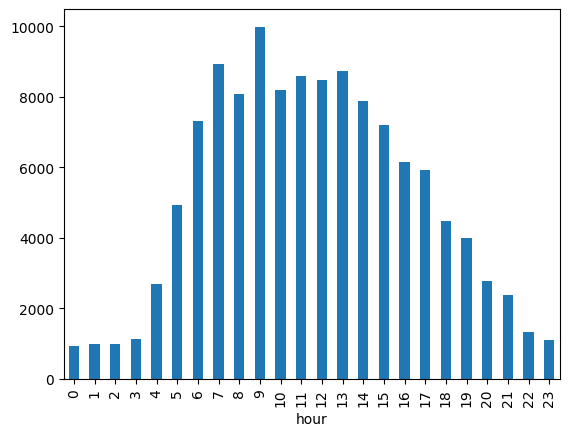

In [74]:
tg['dayofweek'] = tg['date'].dt.day_name()
tg['hour'] = tg['date'].dt.hour
tg.groupby('dayofweek').size().sort_index()
tg.groupby('hour').size().plot(kind='bar')

In [75]:
df[['views', 'forwards', 'replies', 'reactions',
    'delta_views', 'delta_forwards', 'delta_replies', 'delta_reactions']].corr()

,views,forwards,replies,reactions,delta_views,delta_forwards,delta_replies,delta_reactions
views,1.000000,0.362898,-0.135461,-0.530841,0.098358,0.034359,4.656132e-04,2.232830e-02
forwards,0.362898,1.000000,-0.073497,-0.296759,0.026708,0.075409,4.216610e-04,1.073374e-02
replies,-0.135461,-0.073497,1.000000,0.208787,-0.014164,-0.006380,1.508165e-02,-1.466597e-02
reactions,-0.530841,-0.296759,0.208787,1.000000,-0.053989,-0.022122,-6.996495e-04,-3.373516e-02
delta_views,0.098358,0.026708,-0.014164,-0.053989,1.000000,0.509349,2.380327e-03,2.584735e-03
delta_forwards,0.034359,0.075409,-0.006380,-0.022122,0.509349,1.000000,5.372901e-03,1.506736e-03
delta_replies,0.000466,0.000422,0.015082,-0.000700,0.002380,0.005373,1.000000e+00,-6.357377e-07
delta_reactions,0.022328,0.010734,-0.014666,-0.033735,0.002585,0.001507,-6.357377e-07,1.000000e+00


In [76]:
import pandas as pd
import numpy as np

df = df.sort_values(['message_id','cur_date'])
df['delta_h'] = df.groupby('message_id')['cur_date'].diff().dt.total_seconds() / 3600

# убираем совсем короткие интервалы (<0.1ч) и аномальные (>48ч)
df_filt = df.loc[df['delta_h'].between(0.1, 48)]
freq_stats = df_filt['delta_h'].describe(percentiles=[.25,.5,.75,.9,.95])
print(freq_stats)

count    6.758687e+06
mean     2.456233e+01
std      3.630388e+00
min      2.400000e+01
25%      2.400000e+01
50%      2.400000e+01
75%      2.400000e+01
90%      2.400000e+01
95%      2.400000e+01
max      4.800000e+01
Name: delta_h, dtype: float64


In [77]:
anomalies = df[(df['delta_replies'] < 0) | (df['delta_reactions'] < 0) | (df['hours_since_post'] < 0)]
print(anomalies.shape)
anomalies[['message_id','cur_date', 'delta_views', 'delta_forwards','delta_replies','delta_reactions', 'hours_since_post']].head()

(17928, 18)


,message_id,cur_date,delta_views,delta_forwards,delta_replies,delta_reactions,hours_since_post
35,0002bd57-00d6-4d1d-b9cf-7a16ea0a0346,2025-01-23,816.0,3.0,0.0,-746.0,31.558333
391,0006e10d-39d5-48fd-b5d8-3fbc732d09f4,2025-01-23,1.0,0.0,0.0,-84.0,1887.828889
1768,001550fe-05ce-4b78-9098-9737d541e034,2025-01-23,0.0,0.0,0.0,-113.0,2841.006667
2028,0015bce6-89d3-4730-a1ec-cfe57a228d3a,2025-01-23,0.0,0.0,0.0,-487.0,3868.064444
2275,001952ee-d7f8-4af7-afe3-f012f0cb2f52,2025-01-23,0.0,0.0,0.0,-86.0,4360.380556


In [78]:
for col in ['delta_views','delta_forwards','hours_since_post']:
    df.loc[df[col] < 0, col] = 0

In [79]:
# Доля сообщений по каждому каналу
channel_share = (
    tg['id_channel']
    .value_counts(normalize=True)
    .rename_axis('id_channel')
    .reset_index(name='proportion')
    .sort_values('proportion', ascending=False)
)

# Вывод результата
channel_share


,id_channel,proportion
0,3,0.322366
1,1,0.190812
2,4,0.115346
3,6,0.110349
4,18,0.101798
5,2,0.095106
6,5,0.064223


In [80]:
first_cur = re["cur_date"].min()
last_cur  = re["cur_date"].max()

first_post = tg["date"].min()
last_post  = tg["date"].max()

print("Интервал публикаций постов:")
print("  от", first_post, "до", last_post)
print("Интервал съёмов статы:")
print("  от", first_cur, "до", last_cur)

Интервал публикаций постов:
  от 2023-09-23 17:01:04 до 2025-09-08 22:26:58
Интервал съёмов статы:
  от 2024-01-16 00:00:00 до 2025-09-08 00:00:00


In [81]:
# Посты, которые опубликованы после старта съёмов статы
tg_valid = tg[tg["date"] >= "2025-01-01"].copy()
tg.shape, tg_valid.shape

((123273, 8), (86159, 8))

In [82]:
max_h = 72  # макс. горизонт в часах
tg_valid = tg_valid[tg_valid["date"] + pd.Timedelta(hours=max_h) <= last_cur].copy()
tg_valid.shape

(84909, 8)

In [83]:
tg_valid.head()

,post_uuid,message_id,date,message,id_channel,message_vector,dayofweek,hour
0,e46cf62f-2d16-4c73-93b1-1b3952b95e3e,275548,2025-01-02 17:00:02,"Правительство Словакии обсудит меры, которые м...",3,'адекватн':11 'газ':18 'заяв':21 'зеленск':15 ...,Thursday,17
1,792632e5-da04-4341-a674-f8405c8ddd71,275547,2025-01-02 16:40:53,В ДТП с туристическим автобусом в Таиланде пос...,3,'27':9 'автобус':5 'возвращен':31 'гостиниц':3...,Thursday,16
2,dcb05245-5965-4003-81a5-421043394def,275546,2025-01-02 16:20:12,Премьер Израиля Нетаньяху выписан из больницы ...,3,'jerusalem':14 'post':15 'больниц':6 'выписа':...,Thursday,16
3,e91db7c4-d272-4b0b-82f9-425016288476,275545,2025-01-02 15:54:29,Подозреваемый в подрыве автомобиля Tesla Cyber...,3,'cybertruck':6 'tesla':5 'автомобил':4 'вегас'...,Thursday,15
4,c702e716-6806-497b-83ba-764eee4f82e3,275543,2025-01-02 15:32:55,Спецоперация. Обстановка и главные события на ...,3,'-27':33 '1200':16 '13':63 '155':96 '2':7 '202...,Thursday,15


In [89]:
df = (re
      .merge(
          tg_valid[["post_uuid", "id_channel", "date"]],
          left_on=["message_id", "id_channel"],
          right_on=["post_uuid", "id_channel"],
          how="inner",
          suffixes=("", "_post"))
     )

df["cur_day"]  = pd.to_datetime(df["cur_date"]).dt.floor("D")
df["post_day"] = pd.to_datetime(df["date"]).dt.floor("D")

df["days_since_post"] = (df["cur_day"] - df["post_day"]).dt.days
df = df[df["days_since_post"] >= 0].copy()

cur_dt = pd.to_datetime(df["cur_date"]).dt.floor("D") + pd.Timedelta(hours=22)
df["hours_since_post_approx"] = (cur_dt - df["date"]) / pd.Timedelta(hours=1)
df = df[df["hours_since_post_approx"] >= 0]


In [90]:
df.head()

,id,id_channel,cur_date,message_id,views,forwards,replies,reactions,delta_views,delta_forwards,delta_replies,delta_reactions,post_uuid,date,cur_day,post_day,days_since_post,hours_since_post_approx
0,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-07,00027151-a524-4d93-a820-116398fb81bb,492127,381,0,0,492127.0,381.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,2025-04-07,2025-04-07,0,10.1025
1,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-08,00027151-a524-4d93-a820-116398fb81bb,603269,415,0,0,111142.0,34.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,2025-04-08,2025-04-07,1,34.1025
2,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-09,00027151-a524-4d93-a820-116398fb81bb,619397,449,0,0,16128.0,34.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,2025-04-09,2025-04-07,2,58.1025
3,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-10,00027151-a524-4d93-a820-116398fb81bb,625475,449,0,0,6078.0,0.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,2025-04-10,2025-04-07,3,82.1025
4,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-11,00027151-a524-4d93-a820-116398fb81bb,628513,449,0,0,3038.0,0.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,2025-04-11,2025-04-07,4,106.1025


In [91]:
cols_to_drop = [
    "cur_date", 
    "post_day"
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
df.head()

,id,id_channel,message_id,views,forwards,replies,reactions,delta_views,delta_forwards,delta_replies,delta_reactions,post_uuid,date,cur_day,days_since_post,hours_since_post_approx
0,00027151-a524-4d93-a820-116398fb81bb,3,00027151-a524-4d93-a820-116398fb81bb,492127,381,0,0,492127.0,381.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,2025-04-07,0,10.1025
1,00027151-a524-4d93-a820-116398fb81bb,3,00027151-a524-4d93-a820-116398fb81bb,603269,415,0,0,111142.0,34.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,2025-04-08,1,34.1025
2,00027151-a524-4d93-a820-116398fb81bb,3,00027151-a524-4d93-a820-116398fb81bb,619397,449,0,0,16128.0,34.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,2025-04-09,2,58.1025
3,00027151-a524-4d93-a820-116398fb81bb,3,00027151-a524-4d93-a820-116398fb81bb,625475,449,0,0,6078.0,0.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,2025-04-10,3,82.1025
4,00027151-a524-4d93-a820-116398fb81bb,3,00027151-a524-4d93-a820-116398fb81bb,628513,449,0,0,3038.0,0.0,0.0,0.0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,2025-04-11,4,106.1025


In [93]:
df = (
    df
    .merge(
        tg_valid[
            [
                "post_uuid",
                "message",
                "message_vector",
                "dayofweek",
                "hour",
            ]
        ],
        left_on=["message_id"],
        right_on=["post_uuid"],
        how="left"
    )
).drop(columns=["post_uuid_x"])
df.head()

,id,id_channel,message_id,views,forwards,replies,reactions,delta_views,delta_forwards,delta_replies,delta_reactions,date,cur_day,days_since_post,hours_since_post_approx,post_uuid_y,message,message_vector,dayofweek,hour
0,00027151-a524-4d93-a820-116398fb81bb,3,00027151-a524-4d93-a820-116398fb81bb,492127,381,0,0,492127.0,381.0,0.0,0.0,2025-04-07 11:53:51,2025-04-07,0,10.1025,00027151-a524-4d93-a820-116398fb81bb,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,Monday,11
1,00027151-a524-4d93-a820-116398fb81bb,3,00027151-a524-4d93-a820-116398fb81bb,603269,415,0,0,111142.0,34.0,0.0,0.0,2025-04-07 11:53:51,2025-04-08,1,34.1025,00027151-a524-4d93-a820-116398fb81bb,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,Monday,11
2,00027151-a524-4d93-a820-116398fb81bb,3,00027151-a524-4d93-a820-116398fb81bb,619397,449,0,0,16128.0,34.0,0.0,0.0,2025-04-07 11:53:51,2025-04-09,2,58.1025,00027151-a524-4d93-a820-116398fb81bb,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,Monday,11
3,00027151-a524-4d93-a820-116398fb81bb,3,00027151-a524-4d93-a820-116398fb81bb,625475,449,0,0,6078.0,0.0,0.0,0.0,2025-04-07 11:53:51,2025-04-10,3,82.1025,00027151-a524-4d93-a820-116398fb81bb,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,Monday,11
4,00027151-a524-4d93-a820-116398fb81bb,3,00027151-a524-4d93-a820-116398fb81bb,628513,449,0,0,3038.0,0.0,0.0,0.0,2025-04-07 11:53:51,2025-04-11,4,106.1025,00027151-a524-4d93-a820-116398fb81bb,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,Monday,11


In [94]:
df = df.rename(columns={'post_uuid_y': 'post_uuid'})

In [95]:
# import pandas as pd
# #df.to_csv("tmp.csv", index=False)
# df = pd.read_csv("tmp.csv")

In [96]:
df.shape

(5092919, 20)

In [97]:
tg_channels = pd.read_excel("tg_channels.xlsx")
tg_channels

/home/mlcore/conda/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,id,name,subscribers,url,types_reactions,media,lang,date_begin,used,processing_depth,comment
0,1,Раньше всех. Ну почти,1862000,@bbbreaking,{репосты},False,ru,2025-01-01,True,5000,NaN
1,2,Сигналы РЦБ,132000,@cbrstocks,"{реакции,комментарии,репосты}",False,ru,2025-01-01,True,5000,NaN
2,8,Ведомости,50000,@vedomosti,"{реакции,репосты}",False,ru,2025-01-01,False,5000,NaN
3,9,MMI,107000,@russianmacro,"{реакции,комментарии,репосты}",False,ru,2025-01-01,False,5000,NaN
4,11,"Больше, чем экономика",50000,@econs,"{реакции,комментарии,репосты}",False,ru,2025-01-01,False,5000,NaN
5,12,The Bell (Иноагент),100000,@thebell_io,"{реакции,комментарии,репосты}",False,ru,2025-01-01,False,5000,NaN
6,13,КБ. Экономика,295000,@cb_economics,"{реакции,репосты}",False,ru,2025-01-01,False,5000,NaN
7,16,MarketOverview,45000,@MarketOverview,"{реакции,комментарии,репосты}",False,ru,2025-01-01,False,5000,NaN
8,17,Экономика на ночь,83000,@NightEconomic,{репосты},False,ru,2025-01-01,False,5000,NaN
9,19,Баррель черной икры,486000,@banki_oil,{репосты},False,ru,2025-01-01,False,5000,NaN


In [98]:
if "id" in df.columns:
    df = df.rename(columns={"id": "row_id"}) 

df = df.merge(
    tg_channels[["id", "subscribers", "types_reactions"]],
    left_on="id_channel",
    right_on="id",
    how="left"
)

df = df.drop(columns=["id"])

df["has_forwards"]  = df["types_reactions"].str.contains("репост", na=False)
df["has_reactions"] = df["types_reactions"].str.contains("реакц", na=False)
df["has_replies"]   = df["types_reactions"].str.contains("комментар", na=False)


In [99]:
df.loc[0]

row_id                                  00027151-a524-4d93-a820-116398fb81bb
id_channel                                                                 3
message_id                              00027151-a524-4d93-a820-116398fb81bb
views                                                                 492127
forwards                                                                 381
replies                                                                    0
reactions                                                                  0
delta_views                                                         492127.0
delta_forwards                                                         381.0
delta_replies                                                            0.0
delta_reactions                                                          0.0
date                                                     2025-04-07 11:53:51
cur_day                                                  2025-04-07 00:00:00

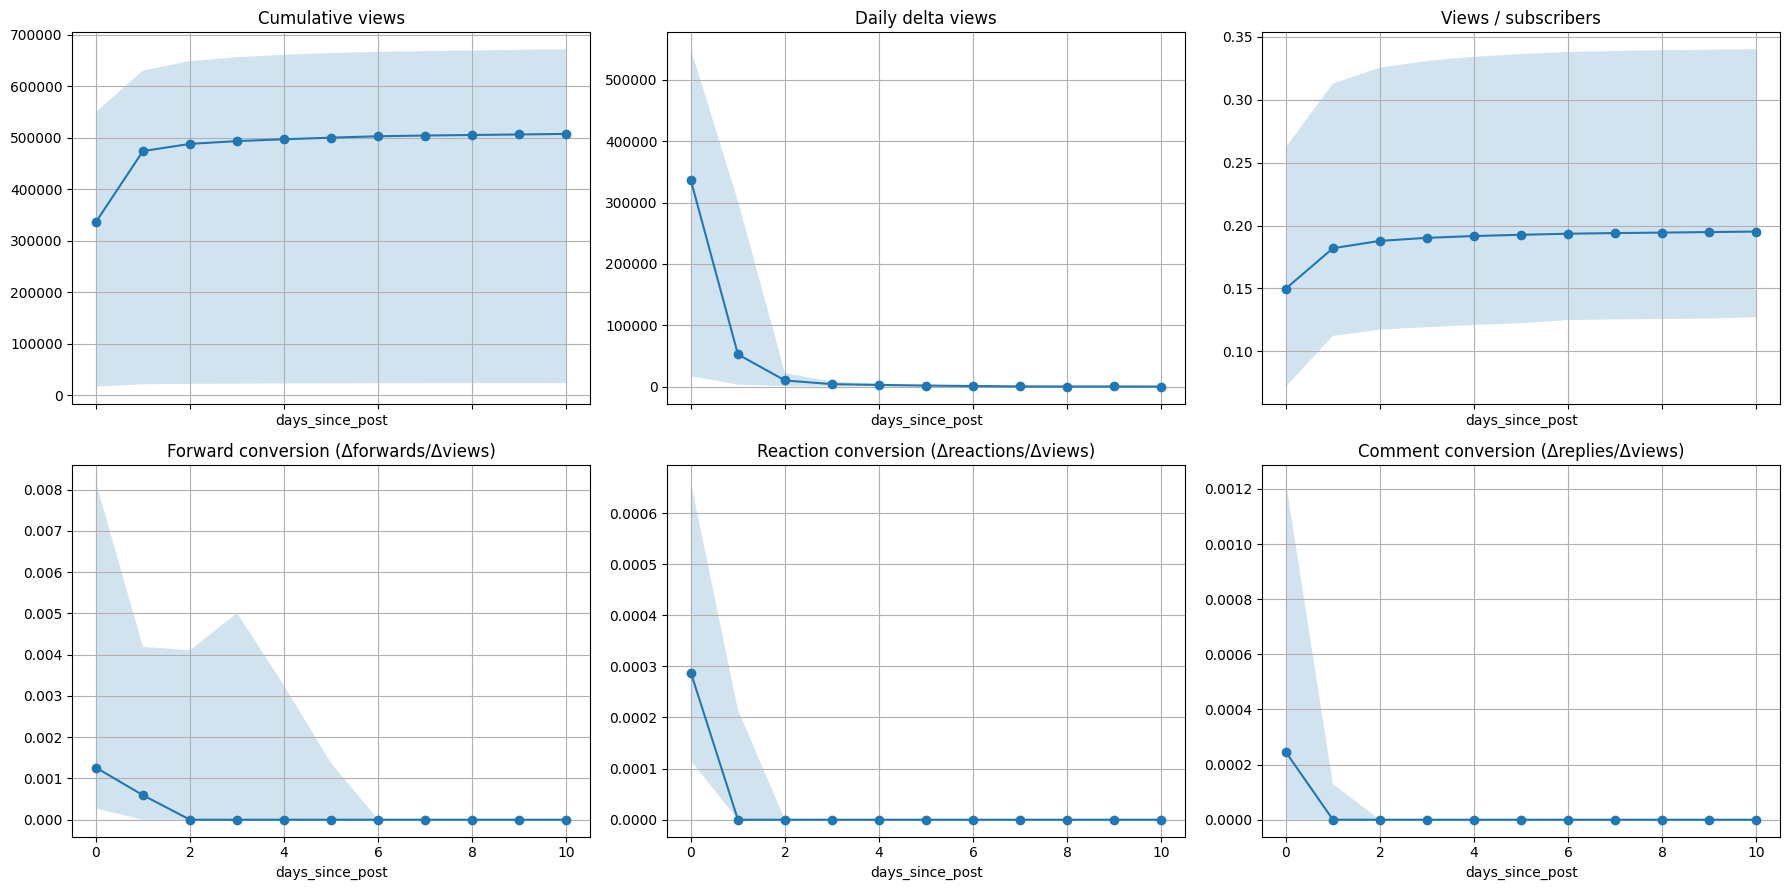

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

MAX_DAY = 10
eps = 1e-9

d = df.copy()
for c in ["days_since_post","views","delta_views","forwards","delta_forwards",
          "reactions","delta_reactions","replies","delta_replies","subscribers"]:
    if c in d.columns:
        d[c] = pd.to_numeric(d[c], errors="coerce")

d = d[d["days_since_post"].between(0, MAX_DAY)].copy()

# derived
d["views_per_sub"] = d["views"] / (d["subscribers"] + eps)
d["delta_views_per_sub"] = d["delta_views"] / (d["subscribers"] + eps)

d["ctr_forwards"]  = d["delta_forwards"]  / (d["delta_views"] + eps)
d["ctr_reactions"] = d["delta_reactions"] / (d["delta_views"] + eps)
d["ctr_replies"]   = d["delta_replies"]   / (d["delta_views"] + eps)

def traj_by_day(df_part, col):
    g = df_part.groupby("days_since_post")[col]
    out = pd.DataFrame({
        "median": g.median(),
        "p10": g.quantile(0.10),
        "p90": g.quantile(0.90),
    }).reindex(range(0, MAX_DAY+1)).reset_index()
    return out

plots = [
    ("views", "Cumulative views", None),
    ("delta_views", "Daily delta views", None),
    ("views_per_sub", "Views / subscribers", None),
    ("ctr_forwards", "Forward conversion (Δforwards/Δviews)", "has_forwards"),
    ("ctr_reactions", "Reaction conversion (Δreactions/Δviews)", "has_reactions"),
    ("ctr_replies", "Comment conversion (Δreplies/Δviews)", "has_replies"),
]
plots += [
    ("delta_forwards", "Daily delta forwards", "has_forwards"),
    ("delta_reactions", "Daily delta reactions", "has_reactions"),
    ("delta_replies", "Daily delta replies", "has_replies"),
]


fig, axes = plt.subplots(2, 3, figsize=(18, 9), sharex=True)
axes = axes.ravel()

for ax, (col, title, flag) in zip(axes, plots):
    part = d.copy()
    if flag is not None and flag in part.columns:
        part = part[part[flag] == True].copy()

    tr = traj_by_day(part, col)
    ax.plot(tr["days_since_post"], tr["median"], marker="o")
    ax.fill_between(tr["days_since_post"], tr["p10"], tr["p90"], alpha=0.2)

    ax.set_title(title)
    ax.set_xlabel("days_since_post")
    ax.grid(True)

plt.tight_layout()
plt.show()


In [102]:
stats_in_day = (re2
    .groupby(["message_id","id_channel","cur_date"])
    .agg(n=("views","size"),
         vmin=("views","min"),
         vmax=("views","max"))
    .reset_index()
)
stats_in_day["delta_in_day"] = stats_in_day["vmax"] - stats_in_day["vmin"]

stats_in_day["delta_in_day"].describe()

count    7.026594e+06
mean     1.168303e+02
std      5.225592e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.134703e+06
Name: delta_in_day, dtype: float64

In [107]:
if "id" in re_day.columns:
    re_day = re_day.rename(columns={"id": "row_id"})

df0 = re_day.merge(
    tg_channels[["id", "subscribers", "types_reactions"]],
    left_on="id_channel",
    right_on="id",
    how="left"
).drop(columns=["id"])

df0["has_forwards"]  = df0["types_reactions"].str.contains("репост", na=False)
df0["has_reactions"] = df0["types_reactions"].str.contains("реакц", na=False)
df0["has_replies"]   = df0["types_reactions"].str.contains("комментар", na=False)


In [108]:
df0 = df0.merge(
    tg_valid[["post_uuid","id_channel","date","message","message_vector","dayofweek","hour"]],
    left_on=["message_id","id_channel"],
    right_on=["post_uuid","id_channel"],
    how="inner"
)

df0["cur_day"] = pd.to_datetime(df0["cur_date"])
df0 = df0.drop(columns=["cur_date"])
df0["date"] = pd.to_datetime(df0["date"])

df0 = df0[df0["cur_day"] >= df0["date"].dt.floor("D")].copy()

df0 = df0.sort_values(["message_id","id_channel","cur_day"])
df0["obs"] = df0.groupby(["message_id","id_channel"]).cumcount()

In [109]:
df0.loc[0]

row_id                          00027151-a524-4d93-a820-116398fb81bb
id_channel                                                         3
message_id                      00027151-a524-4d93-a820-116398fb81bb
views                                                         492127
forwards                                                         381
replies                                                            0
reactions                                                          0
delta_views                                                 492127.0
delta_forwards                                                 381.0
delta_replies                                                    0.0
delta_reactions                                                  0.0
subscribers                                                  3385000
types_reactions                                            {репосты}
has_forwards                                                    True
has_reactions                     

In [112]:
import numpy as np
import pandas as pd

eps = 1e-9
K = 4

d = df0.copy()

# на всякий: типы
d["cur_day"] = pd.to_datetime(d["cur_day"])
d["date"] = pd.to_datetime(d["date"])
d["obs"] = pd.to_numeric(d["obs"], errors="coerce")

# берём первые 4 наблюдения
d = d[d["obs"].between(0, K-1)].copy()

# если в канале метрика невозможна — обнуляем как NaN, чтобы не участвовала
d.loc[~d["has_forwards"],  ["forwards"]]  = np.nan
d.loc[~d["has_reactions"], ["reactions"]] = np.nan
d.loc[~d["has_replies"],   ["replies"]]   = np.nan

# wide по кумулятивам
value_cols = ["views","forwards","reactions","replies"]
wide = (d.set_index(["message_id","obs"])[value_cols]
          .unstack("obs"))

wide.columns = [f"{m}_o{int(k)}" for (m,k) in wide.columns]
wide = wide.reset_index()

# мета-инфа по посту (берём из obs=0)
meta_cols = ["post_uuid", "id_channel","subscribers","types_reactions","has_forwards","has_reactions","has_replies",
             "date","message","message_vector","dayofweek","hour"]
meta_cols = [c for c in meta_cols if c in d.columns]

meta = (d.sort_values(["message_id","obs"])
          .groupby("message_id", as_index=False)[meta_cols]
          .first())

feat = wide.merge(meta, on="message_id", how="left")

# флаги наличия наблюдений
for k in range(K):
    feat[f"has_o{k}"] = feat.get(f"views_o{k}").notna().astype(int)

feat.shape


(84909, 33)

In [116]:
# монотонность views на всякий случай
vcols = [f"views_o{k}" for k in range(K) if f"views_o{k}" in feat.columns]
feat[vcols] = feat[vcols].cummax(axis=1)

# дельты между наблюдениями (важно: не используем delta_* из df0)
for fam in ["views","forwards","reactions","replies"]:
    for k in range(K):
        if k == 0:
            feat[f"delta_{fam}_o0"] = feat.get(f"{fam}_o0")
        else:
            feat[f"delta_{fam}_o{k}"] = feat.get(f"{fam}_o{k}") - feat.get(f"{fam}_o{k-1}")

subs = feat["subscribers"].astype(float) + eps

# per_sub и ctr по первым 2 наблюдениям (обычно хватает o0 и o1)
for k in range(K):
    feat[f"delta_views_per_sub_o{k}"] = feat[f"delta_views_o{k}"] / subs
    feat[f"views_per_sub_o{k}"] = feat.get(f"views_o{k}") / subs

    if f"delta_forwards_o{k}" in feat.columns:
        feat[f"forwards_per_sub_o{k}"] = feat[f"delta_forwards_o{k}"] / subs
    if f"delta_reactions_o{k}" in feat.columns:
        feat[f"reactions_per_sub_o{k}"] = feat[f"delta_reactions_o{k}"] / subs

    dv = feat[f"delta_views_o{k}"]
    feat[f"ctr_forwards_o{k}"]  = feat.get(f"delta_forwards_o{k}")  / (dv + eps)
    feat[f"ctr_reactions_o{k}"] = feat.get(f"delta_reactions_o{k}") / (dv + eps)

# форма кривой (затухание)
feat["decay_o1"] = feat["delta_views_o1"] / (feat["delta_views_o0"] + eps)

feat.head()


,message_id,views_o0,views_o1,views_o2,views_o3,forwards_o0,forwards_o1,forwards_o2,forwards_o3,reactions_o0,...,reactions_per_sub_o2,ctr_forwards_o2,ctr_reactions_o2,delta_views_per_sub_o3,views_per_sub_o3,forwards_per_sub_o3,reactions_per_sub_o3,ctr_forwards_o3,ctr_reactions_o3,decay_o1
0,00027151-a524-4d93-a820-116398fb81bb,492127.0,603269.0,619397.0,625475.0,381.0,415.0,449.0,449.0,NaN,...,NaN,0.002108,NaN,0.001796,0.184778,0.000000e+00,NaN,0.000000,NaN,0.225840
1,0002bd57-00d6-4d1d-b9cf-7a16ea0a0346,29631.0,30447.0,30678.0,30771.0,108.0,111.0,111.0,111.0,752.0,...,0.0,0.000000,0.0,0.000705,0.233114,0.000000e+00,0.0,0.000000,0.0,0.027539
2,0003b835-cf4a-43ff-b155-a144cf56b7f8,486195.0,507393.0,514469.0,517508.0,273.0,273.0,273.0,273.0,NaN,...,NaN,0.000000,NaN,0.000898,0.152883,0.000000e+00,NaN,0.000000,NaN,0.043600
3,00042e3e-de7f-4172-b553-a55477d04f93,454536.0,577938.0,600872.0,609760.0,430.0,500.0,500.0,501.0,NaN,...,NaN,0.000000,NaN,0.004773,0.327476,5.370569e-07,NaN,0.000113,NaN,0.271490
4,0005535a-74a9-4cb9-853f-ce04612d2f94,455967.0,609468.0,627631.0,634731.0,448.0,551.0,551.0,551.0,NaN,...,NaN,0.000000,NaN,0.002097,0.187513,0.000000e+00,NaN,0.000000,NaN,0.336649


In [117]:
feat.columns

Index(['message_id', 'views_o0', 'views_o1', 'views_o2', 'views_o3',
       'forwards_o0', 'forwards_o1', 'forwards_o2', 'forwards_o3',
       'reactions_o0', 'reactions_o1', 'reactions_o2', 'reactions_o3',
       'replies_o0', 'replies_o1', 'replies_o2', 'replies_o3', 'post_uuid',
       'id_channel', 'subscribers', 'types_reactions', 'has_forwards',
       'has_reactions', 'has_replies', 'date', 'message', 'message_vector',
       'dayofweek', 'hour', 'has_o0', 'has_o1', 'has_o2', 'has_o3',
       'delta_views_o0', 'delta_views_o1', 'delta_views_o2', 'delta_views_o3',
       'delta_forwards_o0', 'delta_forwards_o1', 'delta_forwards_o2',
       'delta_forwards_o3', 'delta_reactions_o0', 'delta_reactions_o1',
       'delta_reactions_o2', 'delta_reactions_o3', 'delta_replies_o0',
       'delta_replies_o1', 'delta_replies_o2', 'delta_replies_o3',
       'delta_views_per_sub_o0', 'views_per_sub_o0', 'forwards_per_sub_o0',
       'reactions_per_sub_o0', 'ctr_forwards_o0', 'ctr_reactions_o0

In [118]:
! pip install scikit-learn

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [119]:
! pip install nltk

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [120]:
import re, pandas as pd, numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk

nltk.download("stopwords")


def clean(txt: str) -> str:
    txt = re.sub(r'http\S+|www\.\S+', ' ', txt)        # ссылки
    txt = re.sub(r'[@#]\w+', ' ', txt)                 # @, #
    txt = re.sub(r'\s+', ' ', txt).strip()
    return txt

feat['msg_clean'] = feat['message'].astype(str).map(clean)

# отсечь "пустые" и очень короткие
feat = feat[feat['msg_clean'].str.split().str.len().fillna(0) >= 7]

# # примитивное удаление дубликатов/почти-дубликатов (TF-IDF + косинус)
# sub = df.sample(min(20000, len(df)), random_state=42)
# vec = TfidfVectorizer(min_df=3, max_df=0.6).fit(sub['msg_clean'])
# m = vec.transform(df['msg_clean'])
# # считаем схожесть соседей в пределах канала и суток (ускоряем через группировку при необходимости)
# # простая версия: точные дубли
# df = df.drop_duplicates(subset=['msg_clean'])

# ключи "экономики" (стемы/основы, чтобы покрыть склонения)
ECON_KEEP = r"""
(эконом|инфляц|безработиц|ВВП|ВПП|бюджет|дефицит|профицит|
налог|НДС|акциз|пошлин|тариф|квот|субсид|
ЦБ|центробанк|ключев\w* ставк|ставк[аи]|процентн\w* ставк|
рубл|доллар|евро|курс|валют|
экспорт|импорт|внешне|торгов|таможн|растамож|
санкци|эмбарг|ограничен|CFSP|
нефть|газ|уголь|энергетик|ОПЕК|
индекс|бирж|Мосбирж|NASDAQ|S&P|облигац|ОФЗ|доходност|
инвестиц|капитальн\w* вложен|IPO|IPO|M&A|
кредит|ипотек|займ|банковск|
зарплат|пенси|реальны\w* доход|
промышленн|производств|ПМИ|розниц|опт|
логистик|поставк|порт|жд|контейнер|
таможенн\w* союз|ЕАЭС|пошлин|квот|сертификат происхожд|
сельхоз|агро|зерн|экспортн\w* пошлин|минсельхоз
)
"""

# явные шумы (реклама/мемы/развлечения). Крипту можно вынести в отдельную метку.
NOISE_DROP = r"""
(розыгрыш|конкурс|подписывай|подписк|ставк[аи]\s+на\s+спорт|букмек|казин|промокод|
гороскоп|погода|мем|шутк|анекдот|юмор|рецепт|кино|сериал|шоу|
ваканси|резюме|ищем\s+сотрудник|мерч|
продаж[аи]\s+курсов|вебинар\s+по|реклам|спонсорск|
18\+|NSFW)
"""

# сообщения, которые оставляем, если есть хотя бы 1 эконом-ключ и нет стоп-слов
keep_re = re.compile(ECON_KEEP, re.IGNORECASE | re.VERBOSE)
drop_re = re.compile(NOISE_DROP, re.IGNORECASE | re.VERBOSE)

mask_rule = feat['msg_clean'].str.contains(keep_re) & ~feat['msg_clean'].str.contains(drop_re)
feat = feat[mask_rule].copy()


[nltk_data] Downloading package stopwords to /home/mlcore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_744/2623845594.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_rule = feat['msg_clean'].str.contains(keep_re) & ~feat['msg_clean'].str.contains(drop_re)


In [121]:
feat.shape

(44760, 75)

In [122]:
import numpy as np

eps = 1e-9

# --- helpers ---
def row_max(df, cols):  return df[cols].max(axis=1)
def row_mean(df, cols): return df[cols].mean(axis=1)

dv_cols = [c for c in ["delta_views_o0","delta_views_o1","delta_views_o2","delta_views_o3"] if c in feat.columns]
v_cols  = [c for c in ["views_o0","views_o1","views_o2","views_o3"] if c in feat.columns]

# 1) Peakiness
feat["peak_delta_views_0_3"] = row_max(feat, dv_cols)
feat["mean_delta_views_0_3"] = row_mean(feat, dv_cols)
feat["peakiness_0_3"] = feat["peak_delta_views_0_3"] / (feat["mean_delta_views_0_3"] + eps)

# 2) Early share (только если есть o1 и o3)
if "views_o1" in feat.columns and "views_o3" in feat.columns:
    feat["early_share_1_over_3"] = feat["views_o1"] / (feat["views_o3"] + eps)

# 3) Acceleration ratios
if "delta_views_o0" in feat.columns and "delta_views_o1" in feat.columns:
    feat["acc_01"] = feat["delta_views_o1"] / (feat["delta_views_o0"] + eps)
if "delta_views_o1" in feat.columns and "delta_views_o2" in feat.columns:
    feat["acc_12"] = feat["delta_views_o2"] / (feat["delta_views_o1"] + eps)
if "delta_views_o2" in feat.columns and "delta_views_o3" in feat.columns:
    feat["acc_23"] = feat["delta_views_o3"] / (feat["delta_views_o2"] + eps)

# 4) Best CTR forwards
ctrf_cols = [c for c in ["ctr_forwards_o0","ctr_forwards_o1","ctr_forwards_o2","ctr_forwards_o3"] if c in feat.columns]
feat["best_ctr_forwards_0_3"] = row_max(feat, ctrf_cols)

# 5) Best CTR reactions (только там, где есть реакции)
ctrr_cols = [c for c in ["ctr_reactions_o0","ctr_reactions_o1","ctr_reactions_o2","ctr_reactions_o3"] if c in feat.columns]
feat["best_ctr_reactions_0_3"] = row_max(feat, ctrr_cols)
feat.loc[feat["has_reactions"] == False, "best_ctr_reactions_0_3"] = np.nan

In [123]:
import numpy as np

static_feats = [
    "views_per_sub_o0",
    "forwards_per_sub_o0",
    "ctr_forwards_o0",
    "best_ctr_forwards_0_3", 
    "peakiness_0_3"
]

if "reactions_per_sub_o0" in feat.columns:
    static_feats.append("reactions_per_sub_o0")

sc_static = feat[["message_id","id_channel","message","has_reactions"] + static_feats].copy()

# log1p для heavy-tail (кроме ctr)
for c in static_feats:
    if "ctr_" not in c:
        sc_static[c] = np.log1p(sc_static[c].clip(lower=0))

# percentile внутри канала
for c in static_feats:
    sc_static[c+"_pct"] = sc_static.groupby("id_channel")[c].rank(pct=True)

pct_cols = [c+"_pct" for c in static_feats]

# если реакции недоступны — нейтрально
if "reactions_per_sub_o0_pct" in pct_cols:
    sc_static.loc[feat["has_reactions"] == False, "reactions_per_sub_o0_pct"] = 0.5

sc_static[pct_cols] = sc_static[pct_cols].fillna(0.5)

sc_static["viral_static"] = sc_static[pct_cols].mean(axis=1)


In [124]:
dyn_feats = [
    "delta_views_per_sub_o0",
    "delta_views_per_sub_o1",
    "decay_o1",
    "acc_01",
    "early_share_1_over_3", 
    "peakiness_0_3",
    "best_ctr_forwards_0_3", 
    #"forwards_per_sub_o1"
]

if "forwards_per_sub_o1" in feat.columns:
    dyn_feats.append("forwards_per_sub_o1")

sc_dyn = feat[["message_id","id_channel","message"] + dyn_feats].copy()

# log1p (кроме decay)
for c in dyn_feats:
    if c != "decay_o1":
        sc_dyn[c] = np.log1p(sc_dyn[c].clip(lower=0))

# percentile внутри канала
for c in dyn_feats:
    sc_dyn[c+"_pct"] = sc_dyn.groupby("id_channel")[c].rank(pct=True)

pct_cols_dyn = [c+"_pct" for c in dyn_feats]
sc_dyn[pct_cols_dyn] = sc_dyn[pct_cols_dyn].fillna(0.5)

sc_dyn["viral_dynamic"] = sc_dyn[pct_cols_dyn].mean(axis=1)


In [125]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

ml_feats = [
  "delta_views_per_sub_o0",
  "delta_views_per_sub_o1",
  "forwards_per_sub_o0",
  "ctr_forwards_o0",
  "peakiness_0_3",
  "acc_01",
  "best_ctr_forwards_0_3",
  "has_o1", "has_o2", "has_o3", "has_reactions", "has_replies", 
    
]

# optional:
if "early_share_1_over_3" in feat.columns:
    ml_feats.append("early_share_1_over_3")
if "best_ctr_reactions_0_3" in feat.columns:
    ml_feats.append("best_ctr_reactions_0_3")


X = feat[["id_channel"] + ml_feats].copy()

# log
for c in ml_feats:
    if "ctr_" not in c:
        X[c] = np.log1p(X[c].clip(lower=0))

# percentile внутри канала
for c in ml_feats:
    X[c] = X.groupby("id_channel")[c].rank(pct=True)

# маски NaN
for c in ml_feats:
    X[c+"_isna"] = X[c].isna().astype(int)
    X[c] = X[c].fillna(0.5)

model_cols = ml_feats + [c+"_isna" for c in ml_feats]

Xs = StandardScaler().fit_transform(X[model_cols])

iso = IsolationForest(
    n_estimators=600,
    contamination=0.05,   # допустим 1% вирусных
    random_state=42,
    n_jobs=-1
)

iso.fit(Xs)

feat["viral_ml"] = -iso.decision_function(Xs)


In [126]:
feat["viral_final"] = (
    0.45 * sc_static["viral_static"] +
    0.2 * sc_dyn["viral_dynamic"] +
    0.35 * feat["viral_ml"].rank(pct=True)
)


In [128]:
feat.sort_values("viral_final", ascending=False)[
    ["post_uuid", "message_id","id_channel","viral_final","message"]
].head(20)

,post_uuid,message_id,id_channel,viral_final,message
54739,a4d9bc79-e250-45e8-8b84-fa8d7796e91f,a4d9bc79-e250-45e8-8b84-fa8d7796e91f,2,0.886883,Итоги выступления Трампа:\n\n• За традиционные...
81004,f44d215b-7118-4374-b6d5-89a3432e5e1d,f44d215b-7118-4374-b6d5-89a3432e5e1d,2,0.880512,#GAZP\nВ Газпроме готовятся массовые увольнени...
46517,8bfc194e-2e63-4135-bce7-b01fcd470062,8bfc194e-2e63-4135-bce7-b01fcd470062,2,0.877775,#Санкции #SBER #SVCB #BSPB\nСША частично разре...
36411,6d430201-a06d-41c1-a7d0-542b701049e2,6d430201-a06d-41c1-a7d0-542b701049e2,2,0.877068,#Санкции #SIBN #SNGS #FLOT\nПредварительно был...
31918,5ffeddf7-dfc4-486a-b346-32efd9082d86,5ffeddf7-dfc4-486a-b346-32efd9082d86,2,0.872681,#Политика\n🇺🇸 Дональд Трамп пообещал Дании вве...
45243,883e14ff-cb20-4867-9db5-e9a8125d18e4,883e14ff-cb20-4867-9db5-e9a8125d18e4,5,0.872041,⚡️МАХ ни в коем случае НЕЛЬЗЯ скачивать на лич...
81815,f6d29028-f12b-41dd-ab92-401bba4b0f05,f6d29028-f12b-41dd-ab92-401bba4b0f05,2,0.869815,#Нефтянка #Газ\nПотенциальные запасы нефти и г...
59518,b2d43dd5-e5ab-4dd9-9bfd-f520d1da6729,b2d43dd5-e5ab-4dd9-9bfd-f520d1da6729,2,0.868440,#SIBN #FLOT\nСША разрешили операции с рядом ро...
57899,ae644a32-29e5-4df3-9c06-4f3a9e9c69e6,ae644a32-29e5-4df3-9c06-4f3a9e9c69e6,2,0.868396,#Политика\nПутин поручил до 15 июля создать се...
29856,59ee51e2-52fd-44b5-94b6-7e2305b33c09,59ee51e2-52fd-44b5-94b6-7e2305b33c09,2,0.867348,#Недвижимость\n⚡️ Путин попросил как можно быс...


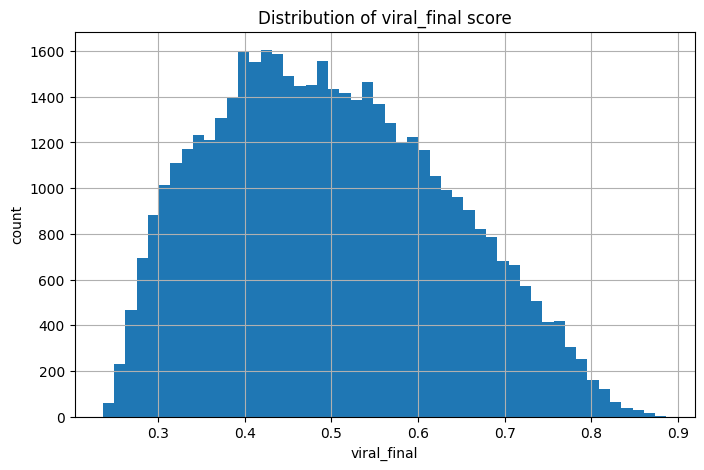

In [129]:
import matplotlib.pyplot as plt

data = feat["viral_final"].dropna()

plt.figure(figsize=(8, 5))
plt.hist(data, bins=50)
plt.xlabel("viral_final")
plt.ylabel("count")
plt.title("Distribution of viral_final score")
plt.grid(True)
plt.show()


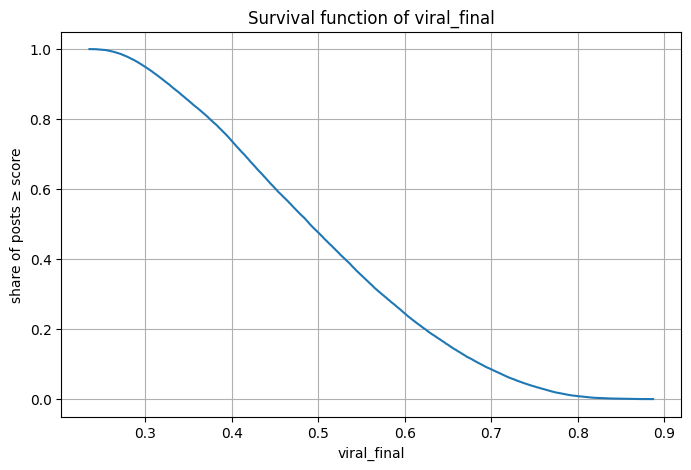

In [130]:
import numpy as np

x = np.sort(data.values)
y = 1.0 - np.arange(len(x)) / len(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.xlabel("viral_final")
plt.ylabel("share of posts ≥ score")
plt.title("Survival function of viral_final")
plt.grid(True)
plt.show()


In [141]:
feat.shape

(44760, 87)

In [142]:
feat.columns

Index(['Unnamed: 0', 'message_id', 'views_o0', 'views_o1', 'views_o2',
       'views_o3', 'forwards_o0', 'forwards_o1', 'forwards_o2', 'forwards_o3',
       'reactions_o0', 'reactions_o1', 'reactions_o2', 'reactions_o3',
       'replies_o0', 'replies_o1', 'replies_o2', 'replies_o3', 'post_uuid',
       'id_channel', 'subscribers', 'types_reactions', 'has_forwards',
       'has_reactions', 'has_replies', 'date', 'message', 'message_vector',
       'dayofweek', 'hour', 'has_o0', 'has_o1', 'has_o2', 'has_o3',
       'delta_views_o0', 'delta_views_o1', 'delta_views_o2', 'delta_views_o3',
       'delta_forwards_o0', 'delta_forwards_o1', 'delta_forwards_o2',
       'delta_forwards_o3', 'delta_reactions_o0', 'delta_reactions_o1',
       'delta_reactions_o2', 'delta_reactions_o3', 'delta_replies_o0',
       'delta_replies_o1', 'delta_replies_o2', 'delta_replies_o3',
       'delta_views_per_sub_o0', 'views_per_sub_o0', 'forwards_per_sub_o0',
       'reactions_per_sub_o0', 'ctr_forwards_o0', 'ct

In [143]:
labeled_df = pd.read_csv("labeled_posts_full.csv")
labeled_df.shape

/tmp/ipykernel_744/2345731504.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  labeled_df = pd.read_csv("labeled_posts_full.csv")


(67255, 12)

In [145]:
feat["message_id"].nunique()

44760

In [146]:
feat = feat.merge(
    labeled_df[['message_id', 'llm_json', 'is_economic', 'topic', 'confidence', 'reason', 'economic_signals', 'noise_signals']],
    on=['message_id'], how='left'
)

# Проверим, что все строки из feat были успешно присоединены
print(feat.shape)  # Печать размера DataFrame, чтобы убедиться, что строки не пропали
print(feat["llm_json"].isna().sum())  # Проверим наличие пропусков


(44760, 94)
0


In [147]:
feat.to_csv("dataset_tg.csv")